<a href="https://colab.research.google.com/github/Snehalavate/Recommending-geographical-proximity/blob/main/capstone_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import requests
from tabulate import tabulate
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')
import os
os.environ.keys()

KeysView(environ({'SHELL': '/bin/bash', 'NV_LIBCUBLAS_VERSION': '11.11.3.6-1', 'NVIDIA_VISIBLE_DEVICES': 'all', 'COLAB_JUPYTER_TRANSPORT': 'ipc', 'NV_NVML_DEV_VERSION': '11.8.86-1', 'NV_CUDNN_PACKAGE_NAME': 'libcudnn8', 'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events', 'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.15.5-1+cuda11.8', 'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.15.5-1', 'VM_GCE_METADATA_HOST': '169.254.169.253', 'HOSTNAME': 'da2550902c0c', 'LANGUAGE': 'en_US', 'TBE_RUNTIME_ADDR': '172.28.0.1:8011', 'GCE_METADATA_TIMEOUT': '3', 'NVIDIA_REQUIRE_CUDA': 'cuda>=11.8 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471', '

//input -latitute & longitude value 18.5204,73.8567

In [ ]:
url = 'https://discover.search.hereapi.com/v1/discover?in=circle:26.2554,88.2009;r=10000&q=apartment&apiKey=dzLPhlQyN8P3LwSpl68Rd39zdhyY96J5AXFC0H6H9Tw'

In [ ]:
data = requests.get(url).json()
d=json_normalize(data['items'])

In [ ]:
d.to_csv("apartment_data.csv")

In [ ]:
d

""


In [ ]:
d2=d[['title','address.label','distance','access','position.lat','position.lng','address.postalCode','id']]
d2.to_csv("cleaned_apartment.csv")
d2

,title,address.label,distance,access,position.lat,position.lng,address.postalCode,id
0,Gopinath Nivas,"Gopinath Nivas, Late Prashant Paigude Path, Bu...",350,"[{'lat': 18.51738, 'lng': 73.85676}]",18.51725,73.85678,411002,here:pds:place:356jx7ps-16571c40ff98087bd15580...
1,Rangprabha,"Rangprabha, Late Prashant Paigude Path, Budhwa...",390,"[{'lat': 18.51723, 'lng': 73.85822}]",18.51720,73.85822,411002,here:pds:place:356jx7ps-d2ca63699aad03d0da8a48...
2,Mantri Heights,"Mantri Heights, Chimaji App Peshwa Path, Budhw...",412,"[{'lat': 18.51782, 'lng': 73.85401}]",18.51778,73.85394,411002,here:pds:place:356tek92-78a6372cbc1744dbbe018a...
3,Mehpura Corner,"Mehpura Corner, Late Kishor Bhadbhade Path, Sh...",437,"[{'lat': 18.51757, 'lng': 73.85385}]",18.51755,73.85385,411030,here:pds:place:356jx7ps-3bd37c1d7928089d8aa684...
4,Athavan,"Athavan, Appa Balwant Chowk, Budhwar Peth, Pun...",512,"[{'lat': 18.51662, 'lng': 73.85384}]",18.51665,73.85389,411002,here:pds:place:356jx7ps-89b6a82750ac043c14bb40...
5,Gokul Niwas,"Gokul Niwas, Appa Balwant Chowk, Hazurpaga, Na...",512,"[{'lat': 18.5165, 'lng': 73.85382}]",18.51665,73.85389,411030,here:pds:place:356jx7ps-179f6ffdc2450fa6ae33e5...
6,Shri Swami Krupa,"Shri Swami Krupa, N C Kelkar Road, Budhwar Pet...",512,"[{'lat': 18.51657, 'lng': 73.85407}]",18.51654,73.85406,411002,here:pds:place:356jx7ps-e405900224f8035d7e96b8...
7,Devanand,"Devanand, N C Kelkar Road, Shaniwar Peth, Pune...",559,"[{'lat': 18.51644, 'lng': 73.85346}]",18.51640,73.85349,411030,here:pds:place:356jx7ps-ee85d59d68650684e5c709...
8,Roman Sadan,"Roman Sadan, Appa Balwant Chowk, Shaniwar Peth...",559,"[{'lat': 18.51647, 'lng': 73.85372}]",18.51640,73.85349,411030,here:pds:place:356jx7ps-d20ec42b191e0ede261e69...
9,Ramchandra Smruti,"Ramchandra Smruti, N C Kelkar Road, Hazurpaga,...",570,"[{'lat': 18.51645, 'lng': 73.85329}]",18.51641,73.85331,411030,here:pds:place:356jx7ps-5337e6cac8a002f2d7a485...


//input- selecting preferences 'cafe', 'gym', 'park', 'hospital', 'bus stop', 'movie theater', 'hotel'

In [ ]:
import requests
import pandas as pd
from pandas import json_normalize

# Assuming 'd2' is your DataFrame containing latitude and longitude information
df_final = d2[['position.lat', 'position.lng']]
latitudes=list(d2['position.lat'])
longitudes=list(d2['position.lng'])


categories = ['cafe', 'gym', 'park', 'hospital', 'bus stop', 'movie theater', 'hotel']

for category in categories:
    category_list = []
    for lat, lng in zip(latitudes, longitudes):
        radius = '1000'  # Set the radius to 1000 meters
        latitude = lat
        longitude = lng

        # Fetch data for the current category
        search_query = category
        url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(
            latitude, longitude, radius, search_query)

        results = requests.get(url).json()

        # Check if 'items' key exists in the results
        if 'items' in results:
            venues = json_normalize(results['items'])
            category_list.append(venues['title'].count())
        else:
            category_list.append(0)

    # Add the counts to the DataFrame
    df_final[category.capitalize() + 's'] = category_list

# Display the final DataFrame
print(df_final)

    position.lat  position.lng  Cafes  Gyms  Parks  Hospitals  Bus stops  \
0       18.51725      73.85678      6    20      8         20         20   
1       18.51720      73.85822      5    19      7         20         20   
2       18.51778      73.85394      7    20     10         20         20   
3       18.51755      73.85385      8    20     11         20         20   
4       18.51665      73.85389     11    20     11         20         20   
5       18.51665      73.85389     11    20     11         20         20   
6       18.51654      73.85406     11    20     11         20         20   
7       18.51640      73.85349     14    20      9         20         20   
8       18.51640      73.85349     14    20      9         20         20   
9       18.51641      73.85331     14    20      8         20         20   
10      18.51582      73.85380     14    20      9         20         20   
11      18.51258      73.85443     20    20      8         20         20   
12      18.5

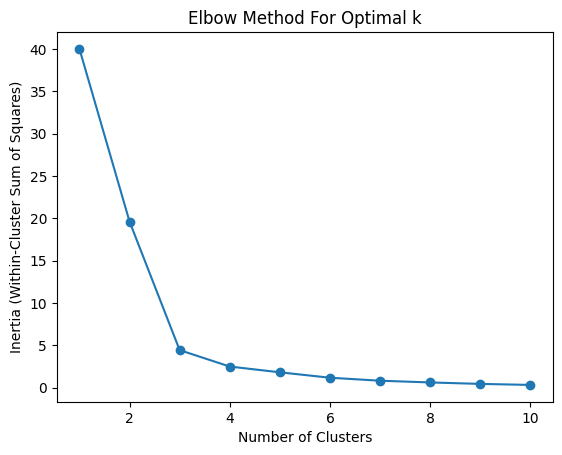

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'df_final' is your DataFrame with latitude and longitude
coordinates = df_final[['position.lat', 'position.lng']]

# Standardize the data (important for clustering algorithms)
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Run KMeans for different numbers of clusters
max_clusters = 10  # You can adjust this based on your problem
inertia_values = []

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(coordinates_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()



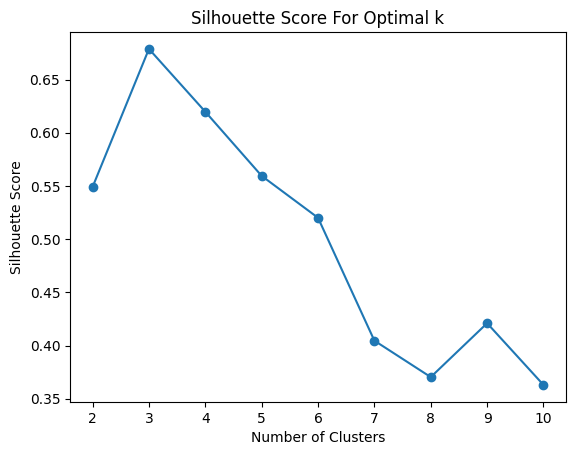

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(coordinates_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(coordinates_scaled, labels))

# Plot the silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df_final' is your DataFrame
features = df_final[['position.lat', 'position.lng']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Experiment with different values of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_final['Cluster'] = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, df_final['Cluster'])
    print(f'For k={k}, Silhouette Score: {silhouette_avg:.2f}')

For k=2, Silhouette Score: 0.55
For k=3, Silhouette Score: 0.68
For k=4, Silhouette Score: 0.62
For k=5, Silhouette Score: 0.56
For k=6, Silhouette Score: 0.52
For k=7, Silhouette Score: 0.40
For k=8, Silhouette Score: 0.37
For k=9, Silhouette Score: 0.42


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df_final' is your DataFrame
features = df_final[['position.lat', 'position.lng']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Experiment with different values of k
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_final['Cluster'] = kmeans.fit_predict(features_scaled)
    db_index = davies_bouldin_score(features_scaled, df_final['Cluster'])
    print(f'For k={k}, Davies-Bouldin Index: {db_index:.2f}')


For k=2, Davies-Bouldin Index: 0.72
For k=3, Davies-Bouldin Index: 0.38
For k=4, Davies-Bouldin Index: 0.46
For k=5, Davies-Bouldin Index: 0.36
For k=6, Davies-Bouldin Index: 0.32
For k=7, Davies-Bouldin Index: 0.44
For k=8, Davies-Bouldin Index: 0.49
For k=9, Davies-Bouldin Index: 0.45


In [ ]:
kclusters = 3

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)
df_final['Cluster']=kmeans.labels_
df_final['Cluster']=df_final['Cluster'].apply(str)
df_final

,position.lat,position.lng,Cafes,Gyms,Parks,Hospitals,Bus stops,Movie theaters,Hotels,Cluster
0,18.51725,73.85678,6,20,8,20,20,2,20,1
1,18.51720,73.85822,5,19,7,20,20,2,20,1
2,18.51778,73.85394,7,20,10,20,20,2,20,1
3,18.51755,73.85385,8,20,11,20,20,2,20,1
4,18.51665,73.85389,11,20,11,20,20,2,20,1
5,18.51665,73.85389,11,20,11,20,20,2,20,1
6,18.51654,73.85406,11,20,11,20,20,2,20,1
7,18.51640,73.85349,14,20,9,20,20,2,20,2
8,18.51640,73.85349,14,20,9,20,20,2,20,2
9,18.51641,73.85331,14,20,8,20,20,3,20,2


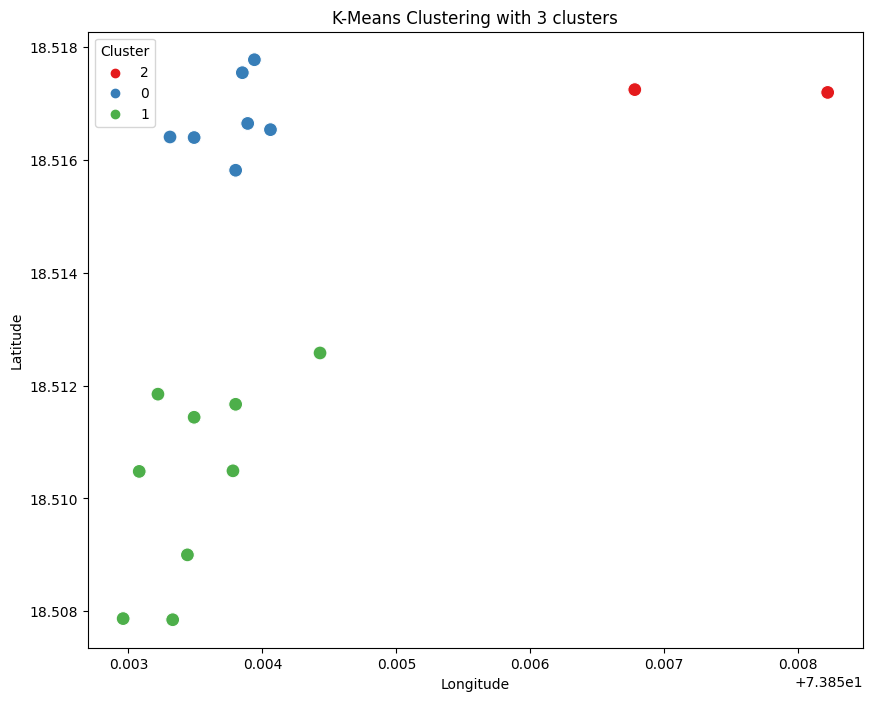

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but it provides a nice styling for the plot

# Assuming 'df_final' is your DataFrame with latitude, longitude, and 'Cluster' column
kclusters = 3

# Assuming 'df_final' is your DataFrame with latitude, longitude, and 'Cluster' column
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final[['position.lat', 'position.lng']])
df_final['Cluster'] = kmeans.labels_.astype(str)

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='position.lng', y='position.lat', hue='Cluster', data=df_final, palette='Set1', edgecolor='w', s=100)
plt.title(f'K-Means Clustering with {kclusters} clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


In [ ]:
import folium
from IPython.display import display

# Assuming 'df_final' is your DataFrame with latitude and longitude
map_center = [df_final['position.lat'].mean(), df_final['position.lng'].mean()]  # Set the center of the map

my_map = folium.Map(location=map_center, zoom_start=12)  # Create a folium map

# Add circles for each data point
for index, row in df_final.iterrows():
    folium.Circle(
        location=[row['position.lat'], row['position.lng']],
        radius=10,  # Adjust the radius as needed
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Point {index}"
    ).add_to(my_map)

# Display the map directly
display(my_map)

output-clustres(feature count visually on map.)

In [ ]:
import folium


# Define coordinates for the map center
map_center = [18.5204,73.8567]

# Create a Folium map
map_bom = folium.Map(location=map_center, zoom_start=12)

# Color scheme for clusters
cluster_colors = {0: 'green', 1: 'yellow', 2: 'red'}  # Update with your actual cluster labels

# Feature group for incidents
locations = folium.map.FeatureGroup()

# Convert 'Cluster' column to integer
df_final['Cluster'] = df_final['Cluster'].astype(int)
# Iterate through data and add CircleMarkers to the map
latitudes = list(df_final['position.lat'])
longitudes = list(df_final['position.lng'])
labels = list(df_final['Cluster'])
names = list(d2['title'])
n_cafes=list(df_final['Cafes'])
n_gyms=list(df_final['Gyms'])
n_parks=list(df_final['Parks'])
n_hospitals=list(df_final['Hospitals'])
n_bus_stops=list(df_final['Bus stops'])
n_movie_theaters=list(df_final['Movie theaters'])
n_hotels=list(df_final['Hotels'])
for lat, lng, label, name, cafe, gym, park, hospital, bus_stop, movie_theater, hotel in zip(latitudes, longitudes, labels, names, n_cafes, n_gyms, n_parks, n_hospitals, n_bus_stops, n_movie_theaters,n_hotels):
    popup_html = f"<b>{name}</b><br>Cluster: {label}<br>"
    popup_html += f"Cafe: {cafe}<br>Gym: {gym}<br>"
    popup_html += f"Park: {park}<br>Hospital: {hospital}<br>"
    popup_html += f"Bus Stop: {bus_stop}<br>Movie Theater: {movie_theater}<br>"
    popup_html += f"Hotel: {hotel}<br>"

    folium.CircleMarker(
        [lat, lng],
        fill=True,
        fill_opacity=1,
        popup=folium.Popup(popup_html, max_width=300),
        radius=5,
        color=cluster_colors[label]
    ).add_to(locations)

# Add the clustered locations to the map
map_bom.add_child(locations)

# Add markers for specific locations (e.g., city center)
folium.Marker([18.5204, 73.8567], popup='City Center', icon=folium.Icon(color='blue')).add_to(map_bom)

# Add legend to explain cluster colors
for cluster, color in cluster_colors.items():
    map_bom.add_child(folium.Marker(location=[0, 0], popup=f'Cluster {cluster}', icon=folium.Icon(color=color)))

# Display the map
map_bom

output-Visulation Analysis of distance beweten data points



In [ ]:
import folium
from folium import plugins

# Your existing code ...

# Iterate through data and add CircleMarkers to the map
for lat, lng, label, name, cafe, gym, park, hospital, bus_stop, movie_theater, hotel in zip(latitudes, longitudes, labels, names, n_cafes, n_gyms, n_parks, n_hospitals, n_bus_stops, n_movie_theaters, n_hotels):
    popup_html = f"<b>{name}</b><br>Cluster: {label}<br>"
    popup_html += f"Cafe: {cafe}<br>Gym: {gym}<br>"
    popup_html += f"Park: {park}<br>Hospital: {hospital}<br>"
    popup_html += f"Bus Stop: {bus_stop}<br>Movie Theater: {movie_theater}<br>"
    popup_html += f"Hotel: {hotel}<br>"

    folium.CircleMarker(
        [lat, lng],
        fill=True,
        fill_opacity=1,
        popup=folium.Popup(popup_html, max_width=300),
        radius=5,
        color=cluster_colors[label]
    ).add_to(locations)

# Add PolyLines to connect data points
folium.PolyLine(list(zip(latitudes, longitudes)), color='gray', weight=1.5, opacity=0.8).add_to(map_bom)

# Your existing code ...

# Display the map
map_bom


output-Visulation Analysis of distance beweten data points

In [ ]:
import folium
from folium import plugins
from geopy.distance import geodesic

# Your existing code ...

# Define coordinates for the map center
map_center = [18.5204, 73.8567]

# Feature group for incidents
locations = folium.map.FeatureGroup()

# Iterate through data and add CircleMarkers to the map
for lat, lng, label, name, cafe, gym, park, hospital, bus_stop, movie_theater, hotel in zip(latitudes, longitudes, labels, names, n_cafes, n_gyms, n_parks, n_hospitals, n_bus_stops, n_movie_theaters, n_hotels):
    popup_html = f"<b>{name}</b><br>Cluster: {label}<br>"
    popup_html += f"Cafe: {cafe}<br>Gym: {gym}<br>"
    popup_html += f"Park: {park}<br>Hospital: {hospital}<br>"
    popup_html += f"Bus Stop: {bus_stop}<br>Movie Theater: {movie_theater}<br>"
    popup_html += f"Hotel: {hotel}<br>"

    # Calculate distance from map_center
    distance_from_center = geodesic((lat, lng), map_center).kilometers
    popup_html += f"Distance from Map Center: {distance_from_center:.2f} km<br>"

    folium.CircleMarker(
        [lat, lng],
        fill=True,
        fill_opacity=1,
        popup=folium.Popup(popup_html, max_width=300),
        radius=5,
        color=cluster_colors[label]
    ).add_to(locations)

# Add PolyLines to connect data points
folium.PolyLine(list(zip(latitudes, longitudes)), color='gray', weight=1.5, opacity=0.8).add_to(map_bom)

# Your existing code ...

# Display the map
map_bom